In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# Learning stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [34]:
nyc_health = pd.read_csv(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\tracts_New_York.csv')

In [35]:
nyc_health

,Unnamed: 0,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,zcta_x,zcta_y,food_closest_travel_times,physical_closest_dist,transport_closest_dist,education_closest_travel_times,worship_closest_travel_times
0,35389,NY,New York,Kings,36047,36047009600,6126,34.5,"(29.5, 39.2)",15.1,...,26.2,"(19.7, 32.7)",POINT (-74.00578419 40.64602128),-74.005780,40.646023,60.348103,0.158023,0.285906,37.900000,24.892878
1,35414,NY,New York,Kings,36047,36047011600,4816,28.0,"(23.5, 32.6)",16.9,...,32.2,"(25.8, 37.9)",POINT (-74.00364817 40.63587202),-74.003650,40.635870,119.790230,0.161144,0.161144,62.737150,125.259940
2,35420,NY,New York,Kings,36047,36047046000,3729,15.0,"(12.9, 17.3)",19.0,...,17.9,"(12.0, 24.8)",POINT (-73.96557391 40.6318131),-73.965576,40.631813,158.354130,0.178936,0.085636,97.572630,7.600000
3,35422,NY,New York,Bronx,36005,36005031400,1966,13.8,"(11.8, 15.9)",22.0,...,11.9,"( 8.1, 16.7)",POINT (-73.84553774 40.8615489),-73.845535,40.861550,101.600000,0.683035,0.188713,65.904180,18.100000
4,35485,NY,New York,Bronx,36005,36005042300,4100,26.7,"(22.7, 31.0)",16.9,...,18.4,"(14.0, 22.7)",POINT (-73.87732222 40.87707259),-73.877320,40.877070,148.684420,0.000343,0.283845,90.369010,120.772600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,53061,NY,New York,Queens,36081,36081113900,3322,13.9,"(11.9, 16.0)",19.7,...,12.3,"( 8.0, 17.5)",POINT (-73.79064204 40.76421748),-73.790640,40.764217,149.751680,0.129437,0.082881,102.718040,38.989790
2147,53062,NY,New York,Kings,36047,36047058000,3365,16.8,"(15.1, 18.5)",18.3,...,17.5,"(12.8, 22.6)",POINT (-73.95544864 40.59899814),-73.955450,40.599000,62.408436,0.286192,0.000097,83.171530,54.999004
2148,53068,NY,New York,New York,36061,36061013900,9257,7.6,"( 6.4, 9.4)",17.3,...,6.9,"( 4.4, 10.7)",POINT (-73.98618103 40.76729463),-73.986180,40.767296,137.177470,0.085202,0.078398,71.648735,33.882988
2149,53070,NY,New York,Queens,36081,36081041400,4033,19.8,"(16.8, 23.0)",20.3,...,23.4,"(15.8, 31.4)",POINT (-73.78072667 40.69965768),-73.780720,40.699657,89.642090,0.178249,0.082825,3.700000,18.997734


In [36]:
nyc_health.columns

Index(['Unnamed: 0', 'StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS',
       'TractFIPS', 'TotalPopulation', 'ACCESS2_CrudePrev',
       'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI',
       'BINGE_CrudePrev', 'BINGE_Crude95CI', 'BPHIGH_CrudePrev',
       'BPHIGH_Crude95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI',
       'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CASTHMA_CrudePrev',
       'CASTHMA_Crude95CI', 'CERVICAL_CrudePrev', 'CERVICAL_Crude95CI',
       'CHD_CrudePrev', 'CHD_Crude95CI', 'CHECKUP_CrudePrev',
       'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev', 'CHOLSCREEN_Crude95CI',
       'COLON_SCREEN_CrudePrev', 'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev',
       'COPD_Crude95CI', 'COREM_CrudePrev', 'COREM_Crude95CI',
       'COREW_CrudePrev', 'COREW_Crude95CI', 'CSMOKING_CrudePrev',
       'CSMOKING_Crude95CI', 'DENTAL_CrudePrev', 'DENTAL_Crude95CI',
       'DEPRESSION_CrudePrev', 'DEPRESSION_Crude95CI', 'DIABETES_CrudePrev',
       'DIABETES_Crude95CI', '

In [37]:
# Get the features
X = nyc_health[['education_closest_travel_times', 'food_closest_travel_times', 'worship_closest_travel_times', 'physical_closest_dist', 'transport_closest_dist']].to_numpy()
ys = {k: nyc_health[k].to_numpy() for k in nyc_health.columns if k.endswith('_CrudePrev')}

In [38]:
remove = pd.isnull(X).any(axis=1)
xs = {}
x_trains, x_tests, y_trains, y_tests = {}, {}, {}, {}
for k, v in ys.items():
    remove1 = pd.isnull(v)
    xs[k] = X[~(remove | remove1)]
    ys[k] = v[~(remove | remove1)]
    x_train, x_test, y_train, y_test = train_test_split(xs[k], ys[k], test_size=0.2)
    x_trains[k] = x_train
    y_trains[k] = y_train
    x_tests[k] = x_test
    y_tests[k] = y_test

In [39]:
unscaled_linear = {}
unscaled_elastic = {}
for k, v in x_trains.items():
    model = LinearRegression()
    model.fit(v, y_trains[k])
    unscaled_linear[k] = model
    model = ElasticNet()
    model.fit(v, y_trains[k])
    unscaled_elastic[k] = model

In [40]:
# Scale the data
for k, v in x_trains.items():
    s_scaler = StandardScaler()
    x_trains[k] = s_scaler.fit_transform(v.astype(float))
    x_tests[k] = s_scaler.transform(x_tests[k].astype(float))

In [41]:
scaled_linear = {}
scaled_elastic = {}
for k, v in x_trains.items():
    model = LinearRegression()
    model.fit(v, y_trains[k])
    scaled_linear[k] = model
    model = ElasticNet()
    model.fit(v, y_trains[k])
    scaled_elastic[k] = model

In [42]:
models = {}
for k, v in x_trains.items():
# Basic dense model
    model = Sequential()
    model.add(Dense(5*8, activation='relu'))
    model.add(Dense(5*4, activation='relu'))
    model.add(Dense(5*2, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mse')
    models[k] = model

In [43]:
# Fit the model
for k, model in tqdm(models.items()):
    model.fit(x=x_trains[k], y=y_trains[k],
          validation_data=(x_tests[k], y_tests[k]),
          batch_size=64, epochs=300, verbose=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [25:52<00:00, 51.74s/it]


ACCESS2_CrudePrev : 3551.0878192395285


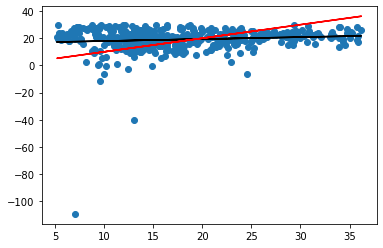

ARTHRITIS_CrudePrev : 1532.8687428712878


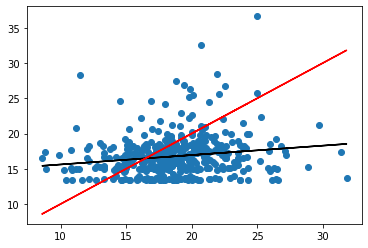

BINGE_CrudePrev : 1537.4586331146982


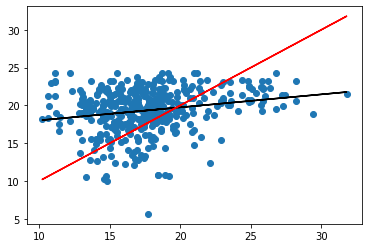

BPHIGH_CrudePrev : 2229.8959730072293


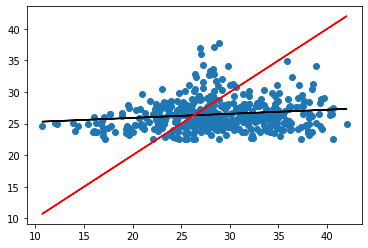

BPMED_CrudePrev : 2692.0654055579475


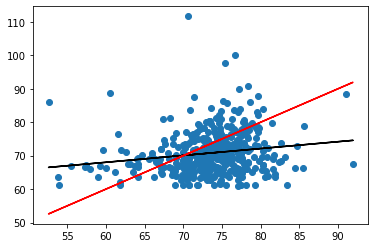

CANCER_CrudePrev : 631.8417629104687


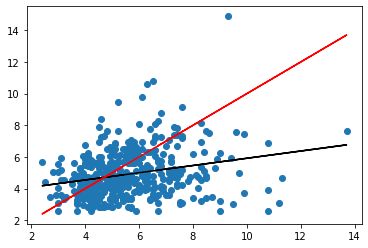

CASTHMA_CrudePrev : 648.5307751058809


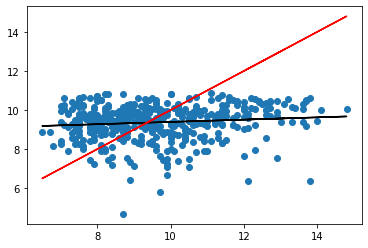

CERVICAL_CrudePrev : 1750.856726766696


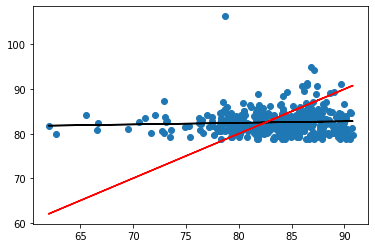

CHD_CrudePrev : 481.1580320253988


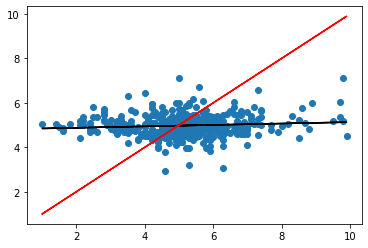

CHECKUP_CrudePrev : 1597.983916027719


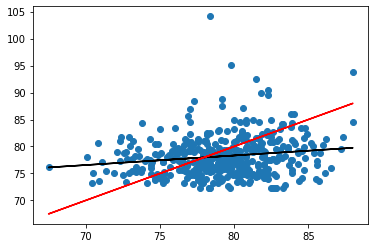

CHOLSCREEN_CrudePrev : 1465.6959564981894


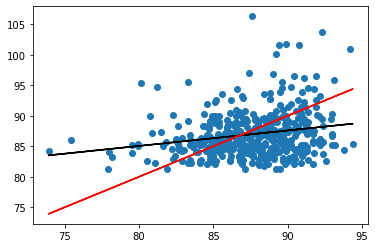

COLON_SCREEN_CrudePrev : 2819.8614600921114


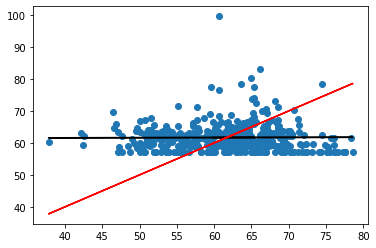

COPD_CrudePrev : 566.3074604474255


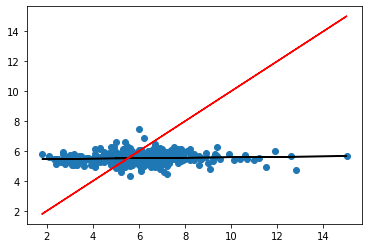

COREM_CrudePrev : 1699.6342216650955


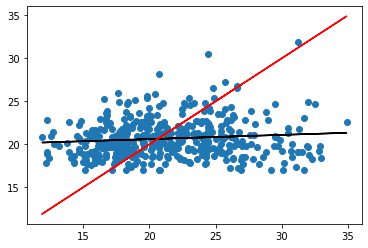

COREW_CrudePrev : 1336.5967188070367


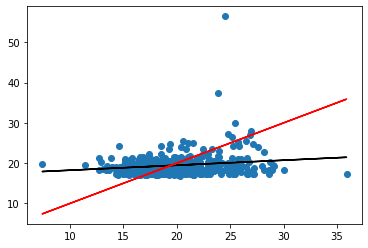

CSMOKING_CrudePrev : 1514.543206580121


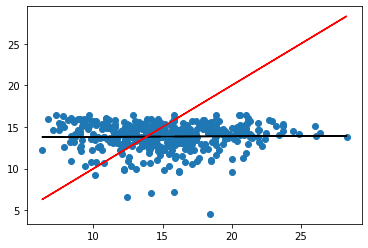

DENTAL_CrudePrev : 4210.190383273354


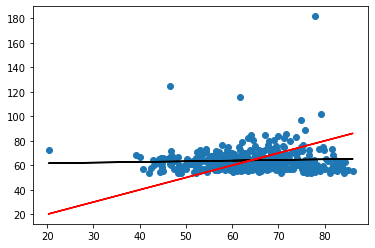

DEPRESSION_CrudePrev : 1107.5611688125598


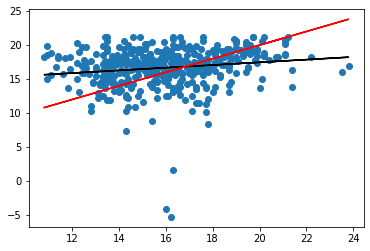

DIABETES_CrudePrev : 1283.2169717567735


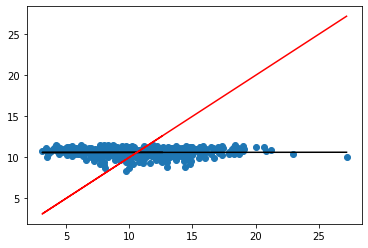

GHLTH_CrudePrev : 3079.610115778977


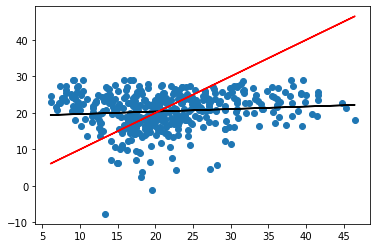

HIGHCHOL_CrudePrev : 1433.2297939671341


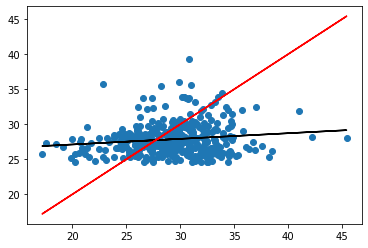

KIDNEY_CrudePrev : 302.33827851689466


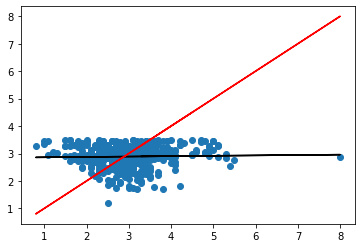

LPA_CrudePrev : 3121.822464131122


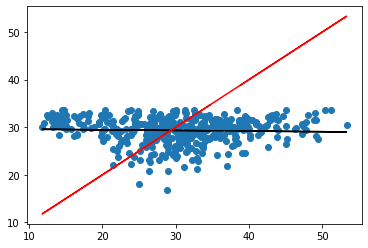

MAMMOUSE_CrudePrev : 1490.60585660317


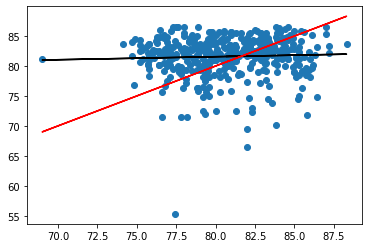

MHLTH_CrudePrev : 1066.119220151662


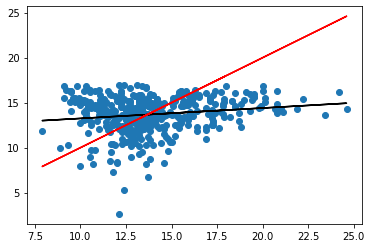

OBESITY_CrudePrev : 2462.4158020781197


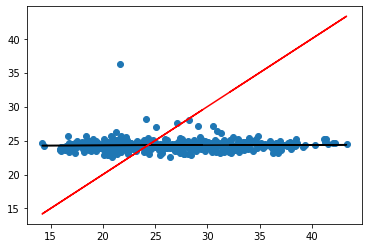

PHLTH_CrudePrev : 1296.0924968728852


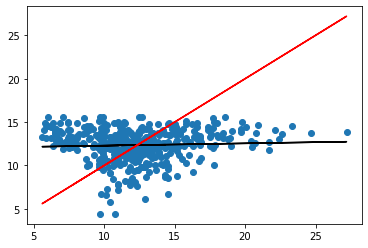

SLEEP_CrudePrev : 1692.0955621120197


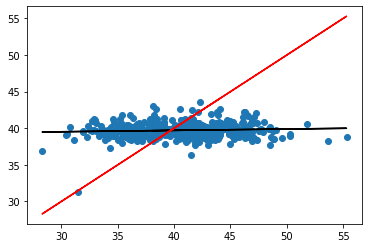

STROKE_CrudePrev : 379.0345238641006


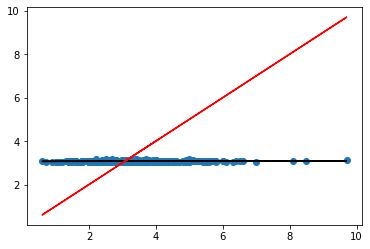

TEETHLOST_CrudePrev : 2762.114918094213


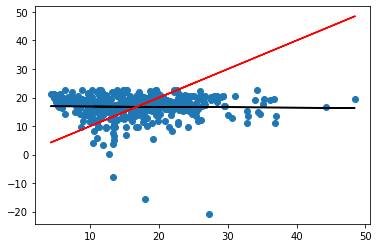

In [44]:
for k, model in unscaled_linear.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 2732.7513115594056


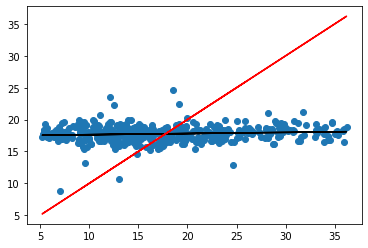

ARTHRITIS_CrudePrev : 1103.417223766005


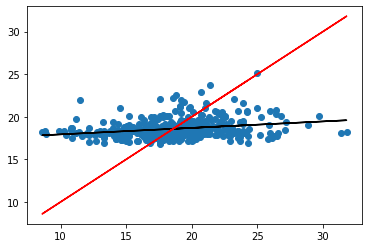

BINGE_CrudePrev : 1088.1069080485615


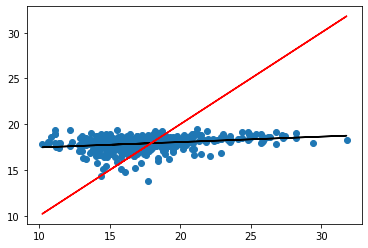

BPHIGH_CrudePrev : 1975.3100024616833


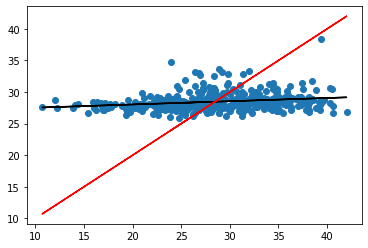

BPMED_CrudePrev : 1589.6797144537143


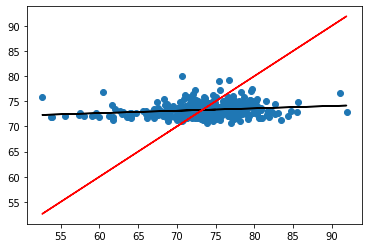

CANCER_CrudePrev : 509.69812849828963


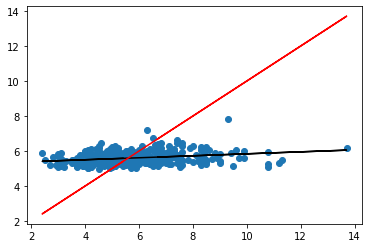

CASTHMA_CrudePrev : 594.4889226220283


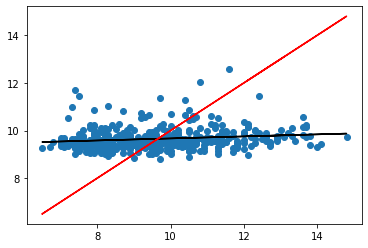

CERVICAL_CrudePrev : 1532.4876293328653


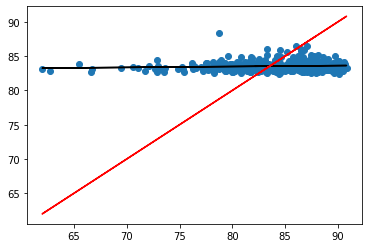

CHD_CrudePrev : 457.6967209360797


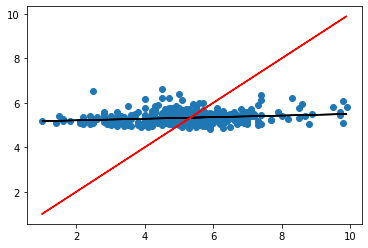

CHECKUP_CrudePrev : 1126.493534134741


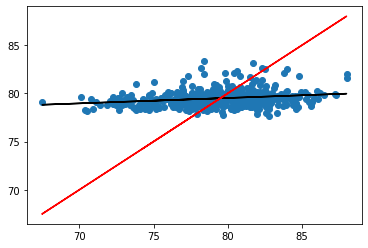

CHOLSCREEN_CrudePrev : 1041.616007649066


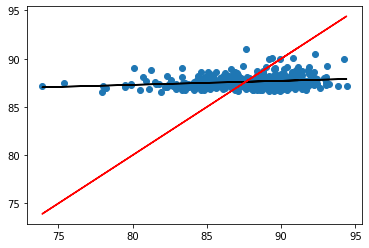

COLON_SCREEN_CrudePrev : 2495.0852502323532


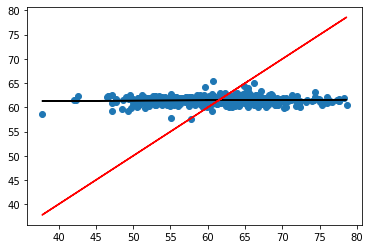

COPD_CrudePrev : 536.3890297661346


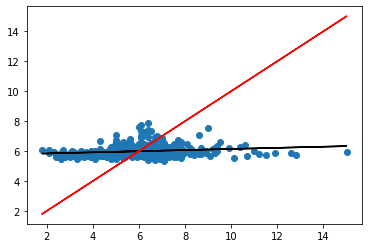

COREM_CrudePrev : 1646.112059977363


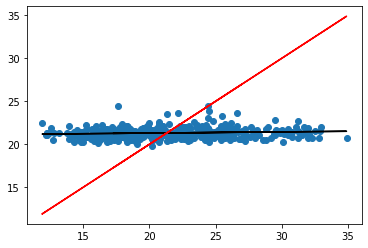

COREW_CrudePrev : 1250.948673676633


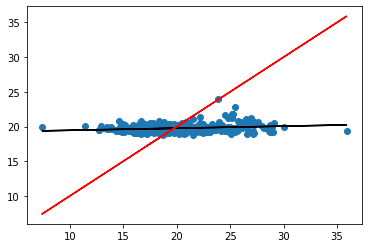

CSMOKING_CrudePrev : 1333.8440529066302


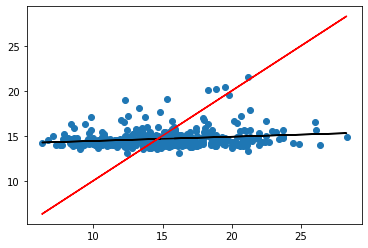

DENTAL_CrudePrev : 3585.9275244376367


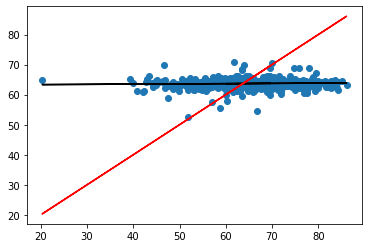

DEPRESSION_CrudePrev : 802.9849334940061


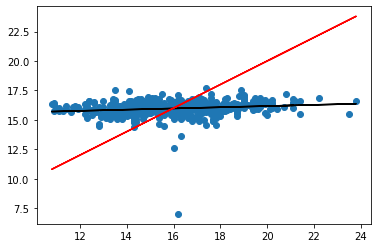

DIABETES_CrudePrev : 1255.9802778387348


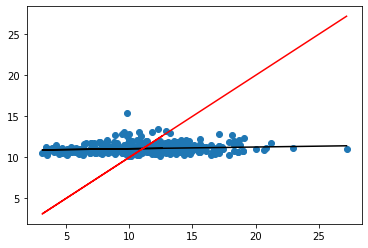

GHLTH_CrudePrev : 2634.9379606724333


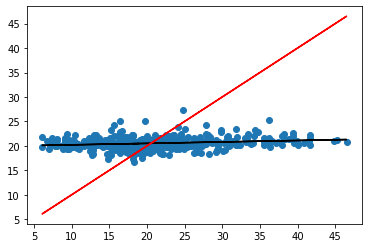

HIGHCHOL_CrudePrev : 1206.061133017174


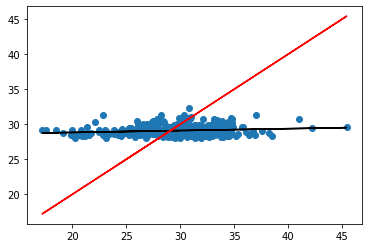

KIDNEY_CrudePrev : 263.8504599151254


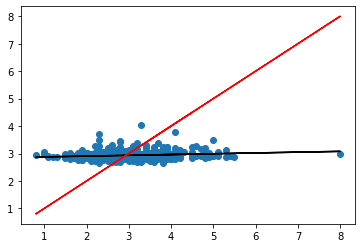

LPA_CrudePrev : 2840.825494103566


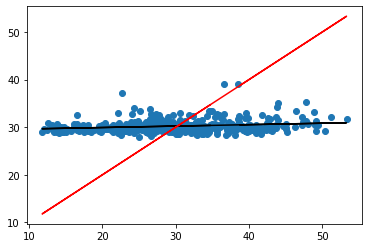

MAMMOUSE_CrudePrev : 1081.6697365590146


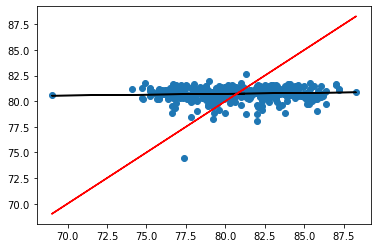

MHLTH_CrudePrev : 893.1080367184019


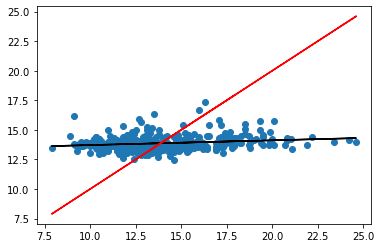

OBESITY_CrudePrev : 2228.786940580004


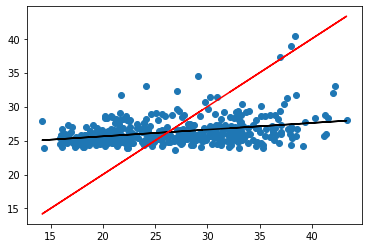

PHLTH_CrudePrev : 1120.13289176564


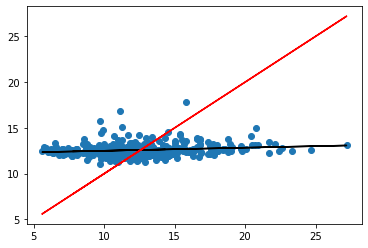

SLEEP_CrudePrev : 1648.9655655902025


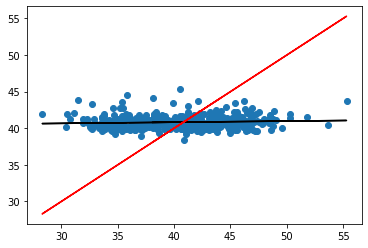

STROKE_CrudePrev : 366.86057567111584


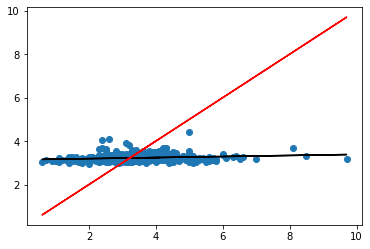

TEETHLOST_CrudePrev : 2372.5436599942495


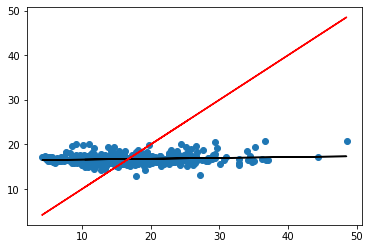

In [45]:
for k, model in scaled_linear.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 2724.9215140427505


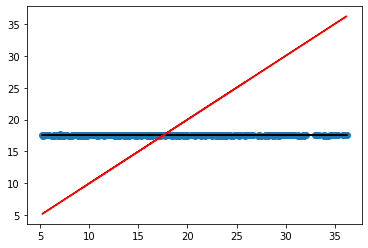

ARTHRITIS_CrudePrev : 1279.9418559650628


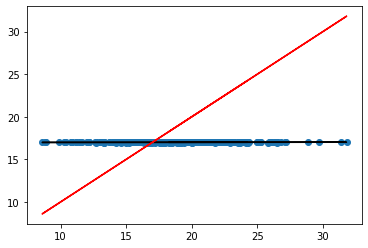

BINGE_CrudePrev : 1280.1934802598003


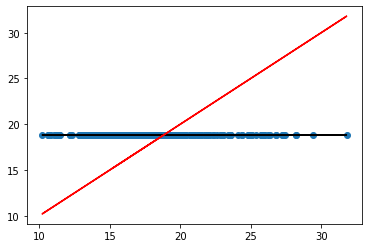

BPHIGH_CrudePrev : 2101.087321716932


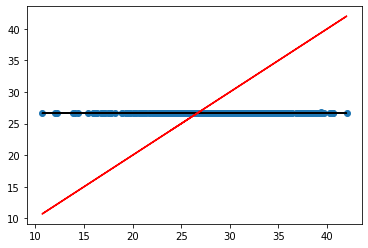

BPMED_CrudePrev : 1746.021031240029


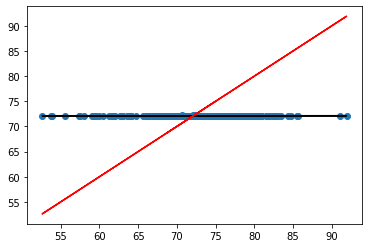

CANCER_CrudePrev : 528.7653366086274


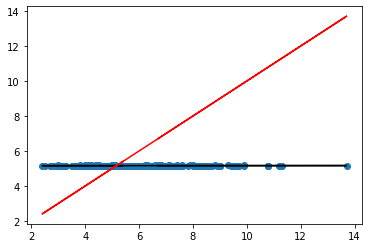

CASTHMA_CrudePrev : 598.3406235023688


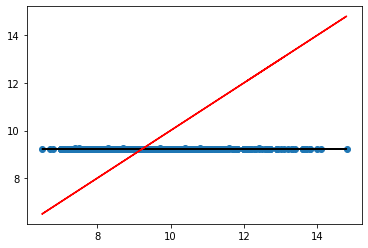

CERVICAL_CrudePrev : 1579.0587370626304


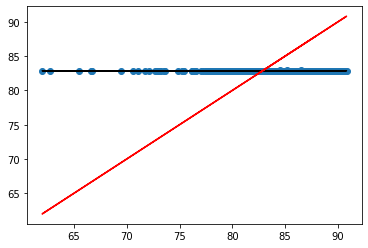

CHD_CrudePrev : 454.6640075990747


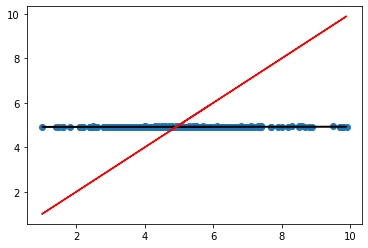

CHECKUP_CrudePrev : 1179.9040716905754


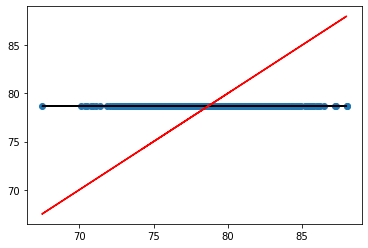

CHOLSCREEN_CrudePrev : 1092.9830198925597


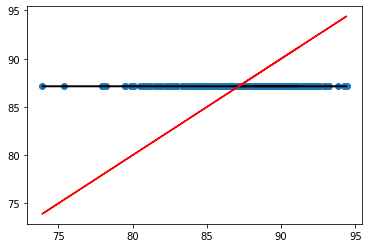

COLON_SCREEN_CrudePrev : 2488.782969125469


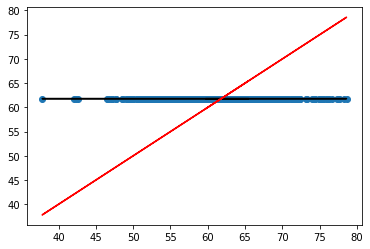

COPD_CrudePrev : 565.3049630464717


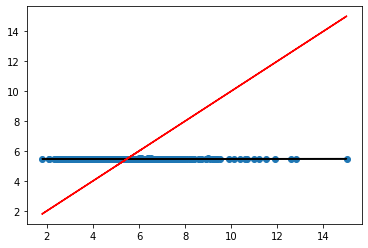

COREM_CrudePrev : 1655.980401486076


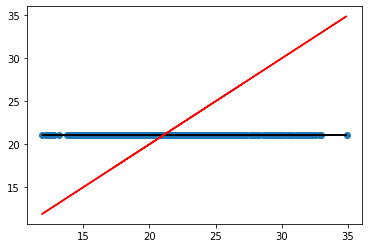

COREW_CrudePrev : 1282.8551005824531


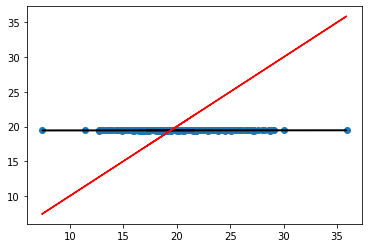

CSMOKING_CrudePrev : 1394.1927983281603


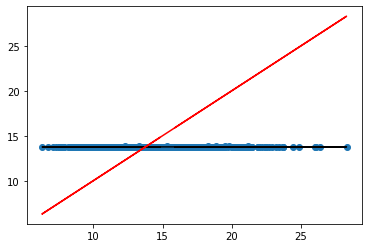

DENTAL_CrudePrev : 3559.114996213071


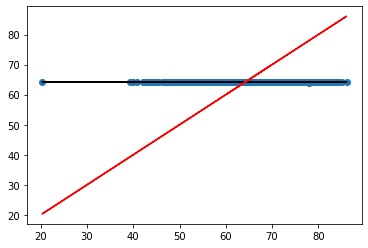

DEPRESSION_CrudePrev : 816.201032251118


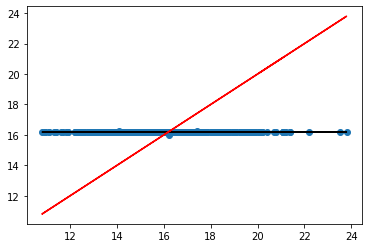

DIABETES_CrudePrev : 1276.453350270077


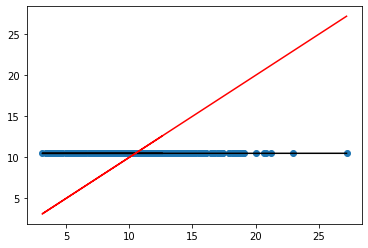

GHLTH_CrudePrev : 2689.282273101448


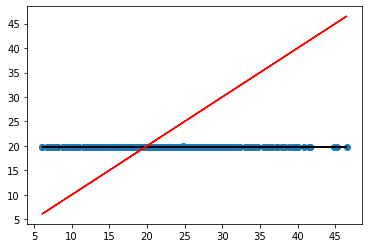

HIGHCHOL_CrudePrev : 1311.438454273742


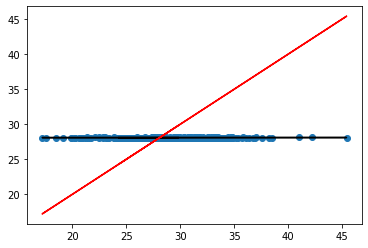

KIDNEY_CrudePrev : 269.3256954864504


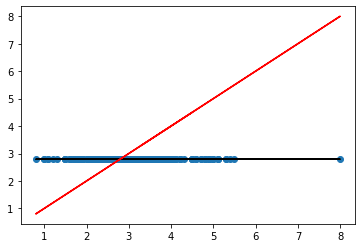

LPA_CrudePrev : 2879.6633177816766


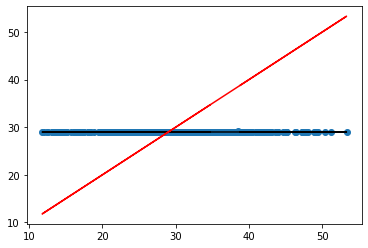

MAMMOUSE_CrudePrev : 1100.8176983250837


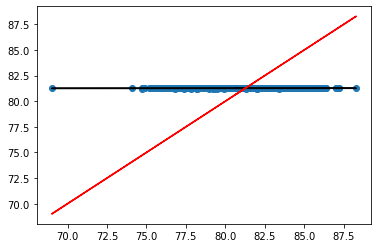

MHLTH_CrudePrev : 886.0107581777593


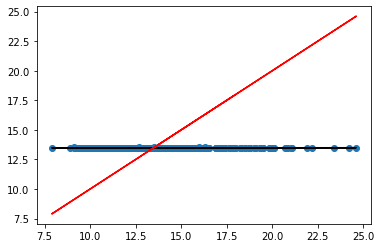

OBESITY_CrudePrev : 2452.90434521645


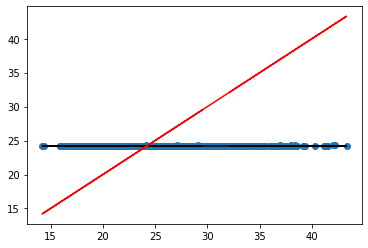

PHLTH_CrudePrev : 1111.9007524185163


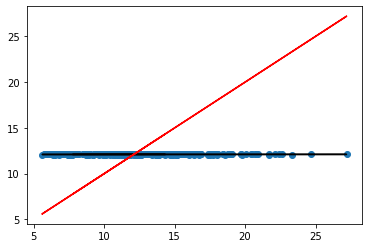

SLEEP_CrudePrev : 1688.9629029829766


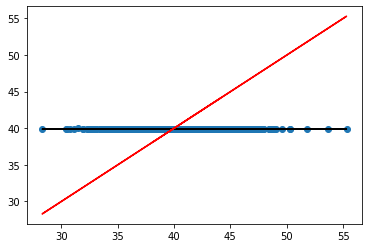

STROKE_CrudePrev : 380.05393009938746


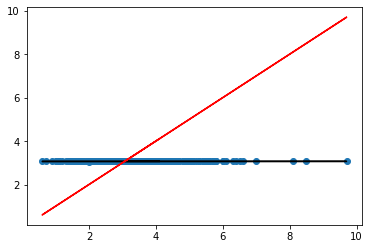

TEETHLOST_CrudePrev : 2382.8891769557395


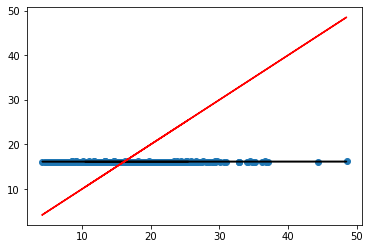

In [46]:
for k, model in unscaled_elastic.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 2717.4327369864986


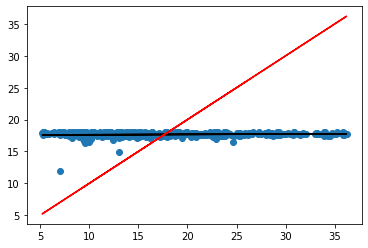

ARTHRITIS_CrudePrev : 1120.0673658088594


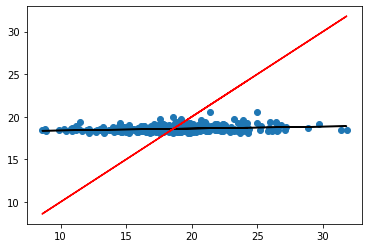

BINGE_CrudePrev : 1127.4117573032822


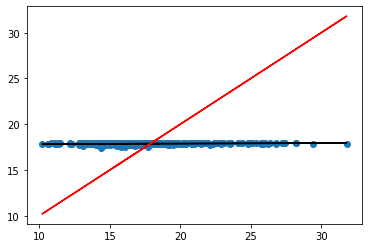

BPHIGH_CrudePrev : 1982.500790659014


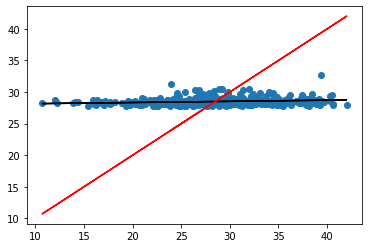

BPMED_CrudePrev : 1593.9698347236288


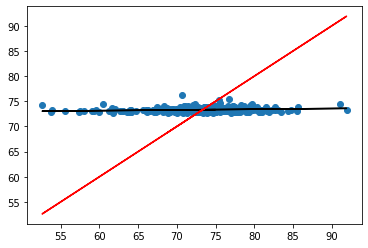

CANCER_CrudePrev : 539.1215366705472


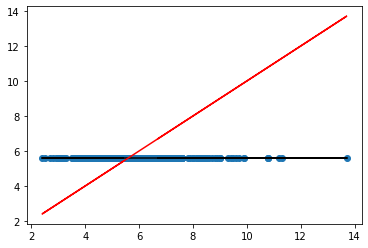

CASTHMA_CrudePrev : 602.8509895227008


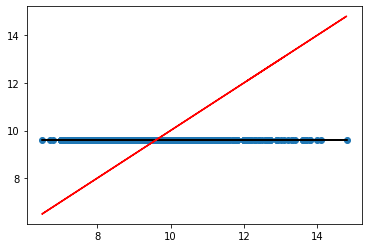

CERVICAL_CrudePrev : 1535.8113953488376


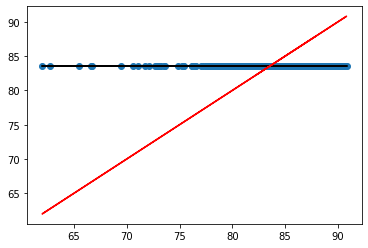

CHD_CrudePrev : 455.28847497089635


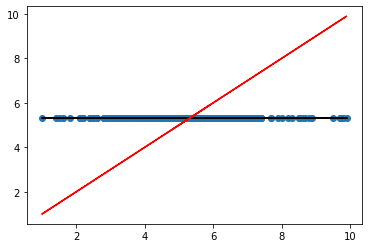

CHECKUP_CrudePrev : 1142.8303223389362


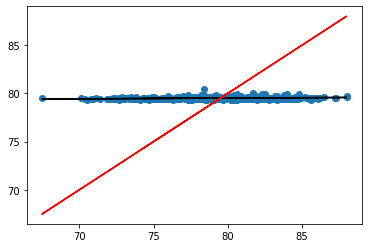

CHOLSCREEN_CrudePrev : 1067.6213038416768


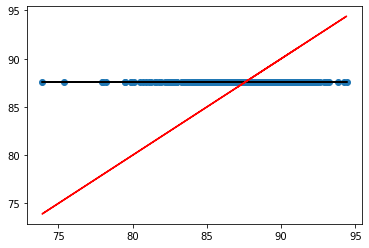

COLON_SCREEN_CrudePrev : 2503.3286141787617


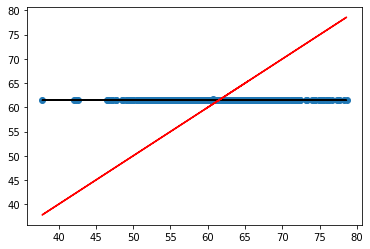

COPD_CrudePrev : 540.01944121071


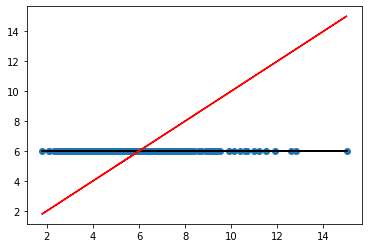

COREM_CrudePrev : 1665.1751748251745


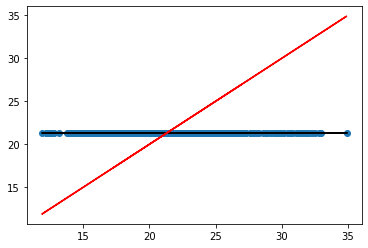

COREW_CrudePrev : 1289.3572759022118


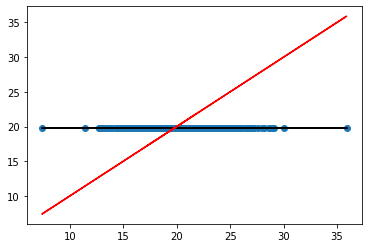

CSMOKING_CrudePrev : 1346.9102094041618


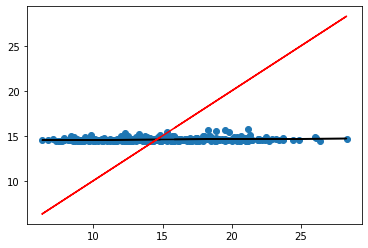

DENTAL_CrudePrev : 3549.5371743055284


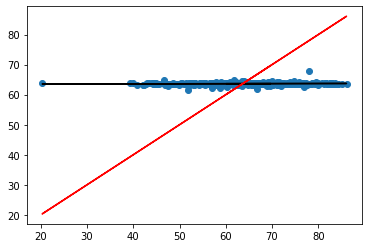

DEPRESSION_CrudePrev : 811.5458672875436


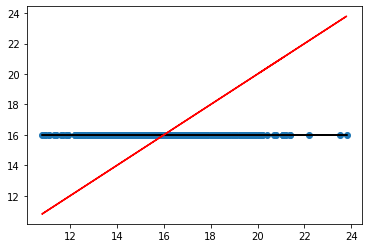

DIABETES_CrudePrev : 1260.231638307096


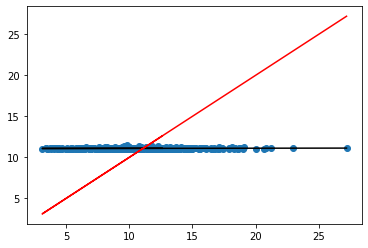

GHLTH_CrudePrev : 2684.946475597608


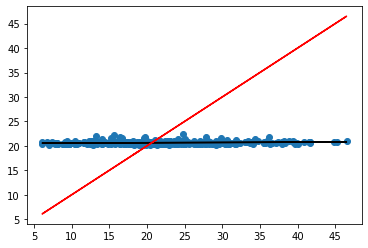

HIGHCHOL_CrudePrev : 1213.7908016707643


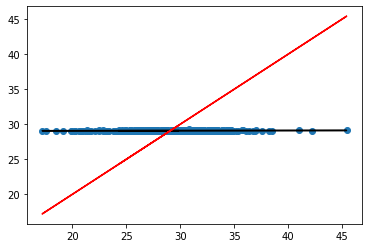

KIDNEY_CrudePrev : 267.75995343422585


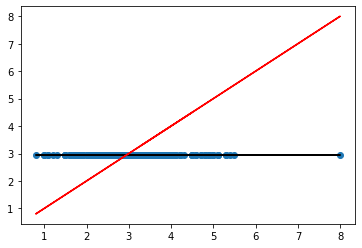

LPA_CrudePrev : 2843.5469916131947


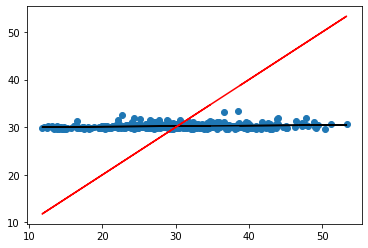

MAMMOUSE_CrudePrev : 1090.7266279069768


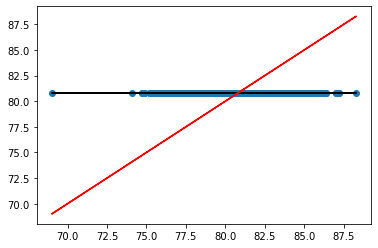

MHLTH_CrudePrev : 908.0359720605355


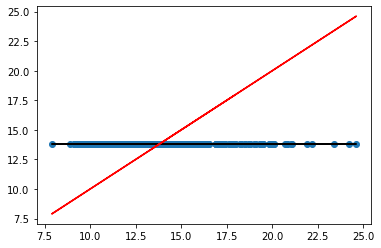

OBESITY_CrudePrev : 2278.721696397836


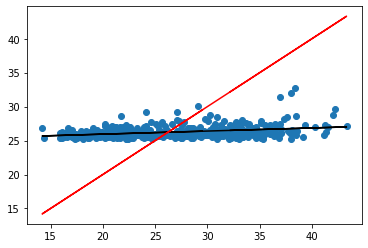

PHLTH_CrudePrev : 1132.0866075585486


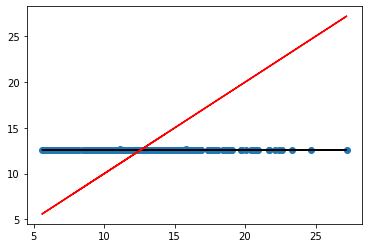

SLEEP_CrudePrev : 1643.2924215448916


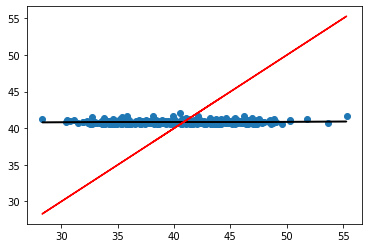

STROKE_CrudePrev : 374.88102444703145


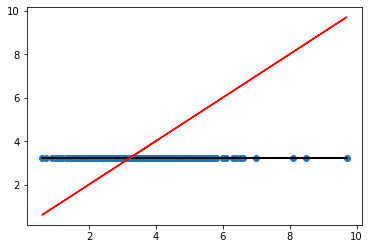

TEETHLOST_CrudePrev : 2384.823369813308


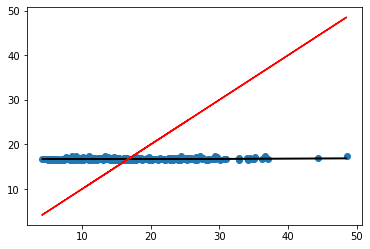

In [47]:
for k, model in scaled_elastic.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 1233324.445968437


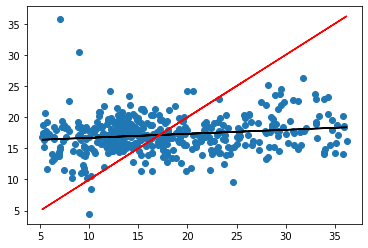

ARTHRITIS_CrudePrev : 561394.8615982056


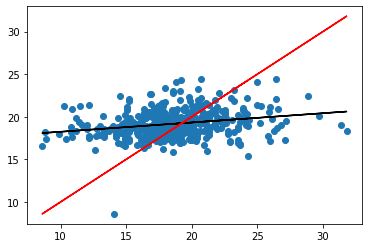

BINGE_CrudePrev : 551967.251599884


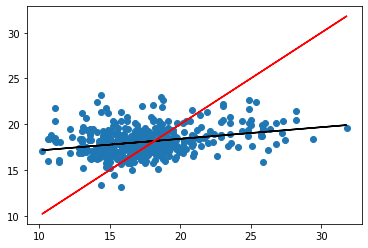

BPHIGH_CrudePrev : 3812054.8758163447


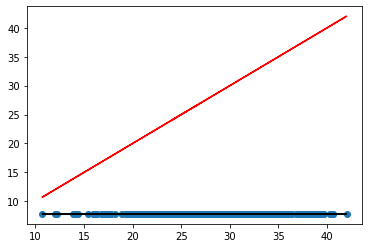

BPMED_CrudePrev : 753836.7076782227


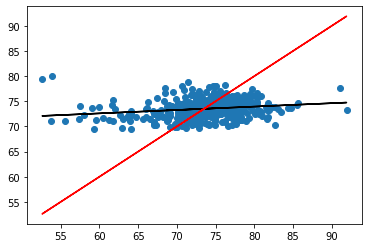

CANCER_CrudePrev : 249600.2873224259


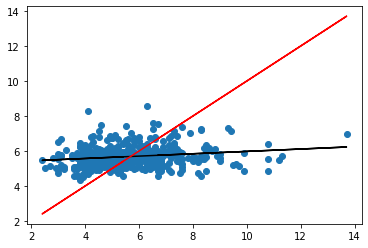

CASTHMA_CrudePrev : 283768.1422197342


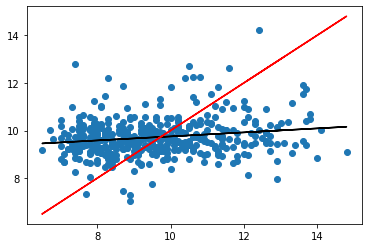

CERVICAL_CrudePrev : 724765.6189697265


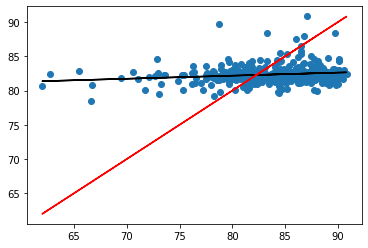

CHD_CrudePrev : 248646.39010887148


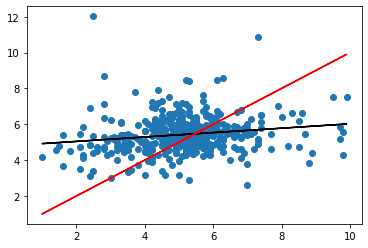

CHECKUP_CrudePrev : 530654.1296081543


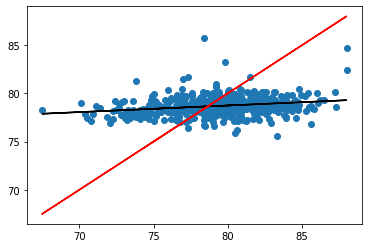

CHOLSCREEN_CrudePrev : 493318.729888916


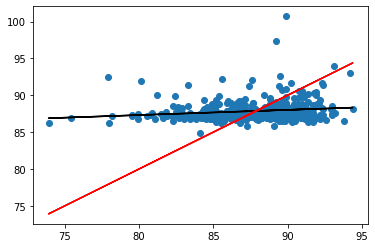

COLON_SCREEN_CrudePrev : 1124796.7520484927


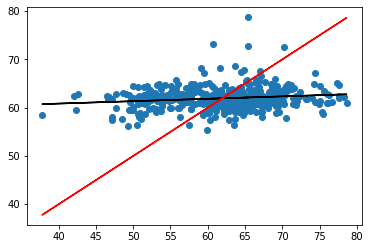

COPD_CrudePrev : 277346.87363853457


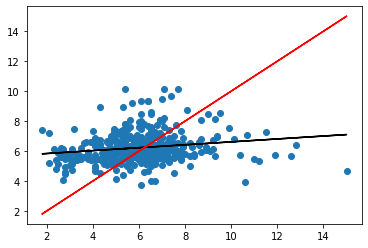

COREM_CrudePrev : 737213.0645614625


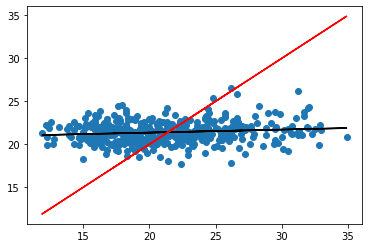

COREW_CrudePrev : 625267.2029289247


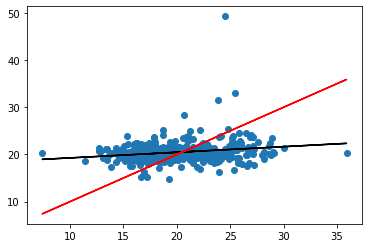

CSMOKING_CrudePrev : 643117.111246109


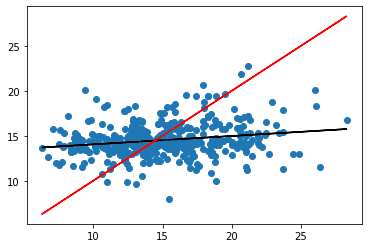

DENTAL_CrudePrev : 1653649.3169296263


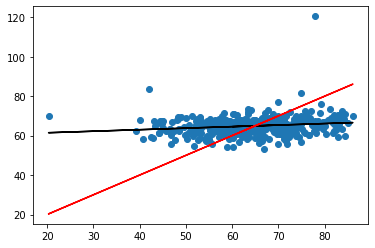

DEPRESSION_CrudePrev : 385250.2356754303


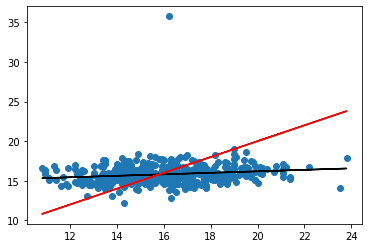

DIABETES_CrudePrev : 595717.8510484694


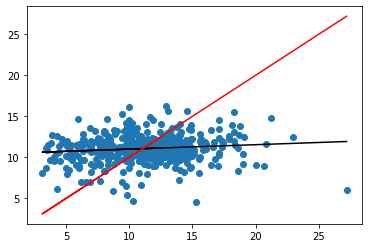

GHLTH_CrudePrev : 1240945.7546218873


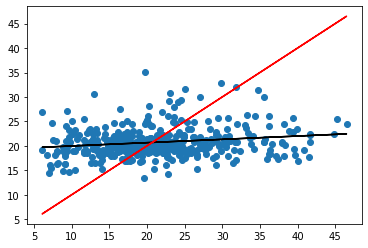

HIGHCHOL_CrudePrev : 572580.7830856321


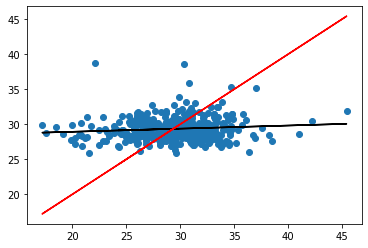

KIDNEY_CrudePrev : 115132.92392349245


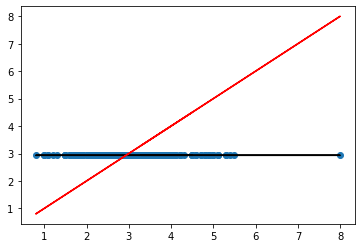

LPA_CrudePrev : 1294059.9269470212


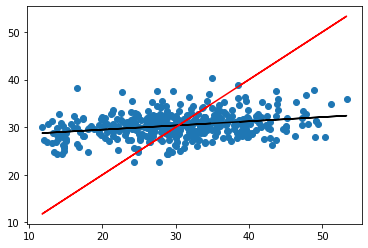

MAMMOUSE_CrudePrev : 530200.1118347168


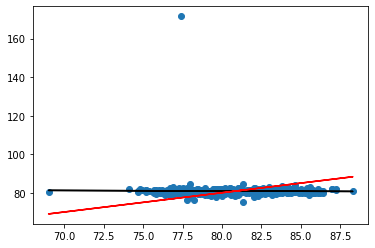

MHLTH_CrudePrev : 420578.70839405054


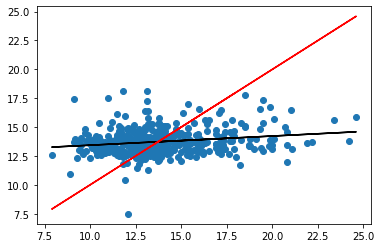

OBESITY_CrudePrev : 1103387.4200805665


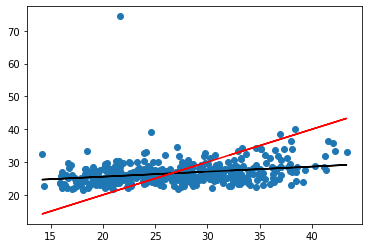

PHLTH_CrudePrev : 546710.1313116073


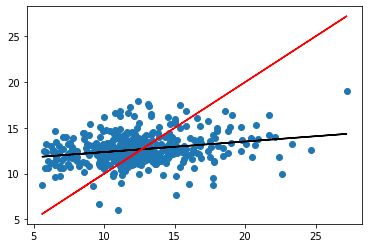

SLEEP_CrudePrev : 764690.1313446045


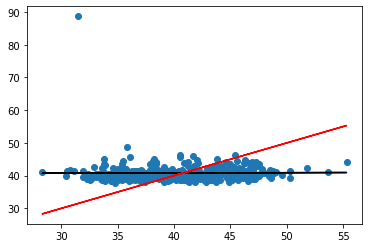

STROKE_CrudePrev : 181231.4361115933


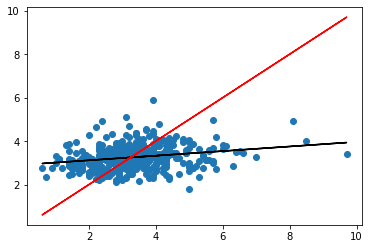

TEETHLOST_CrudePrev : 1104762.9786849977


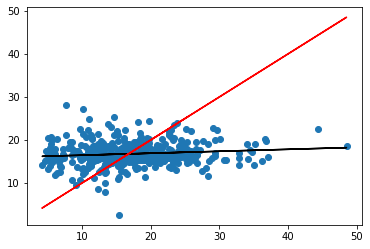

In [48]:
# Red - perfect fit; Black - actual fit
for k, model in models.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))  # Hmmm...
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()